# Spatial_Fltering_Using_Pillow

# Geometric Operations and Other Mathematical Tools with Pillow

Spatial Operations in Image Processing
Spatial operations use pixels in a neighborhood to determine the present pixel value. Some applications include filtering and sharpening. They are used in many steps in computer vision, such as segmentation, and are a key building block in Artificial Intelligence algorithms.

Linear Filtering  <br>
Filtering Noise <br>
Gaussian Blur <br>
Image Sharpening <br>
Edges <br>
Median <br>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [3]:
def plot_image(image_1, image_2, title_1="Original", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(image_1)
    plt.title(title_1)
    plt.subplot(1,2,2)
    plt.imshow(image_2)
    plt.title(title_2)
    plt.show()

# Linear Filtering
Filtering involves enhancing an image, for example, removing the noise from an image. Noise can be caused by a bad camera or bad image compression. The same factors that cause noise may lead to blurry images. We can apply filters to sharpen these images. Convolution is a standard way to filter an image. The filter is called the kernel and different kernels perform different tasks. In addition, Convolution is used for many of the most advanced artificial intelligence algorithms. We simply take the dot product of the kernel and an equally-sized portion of the image. We then shift the kernel and repeat.

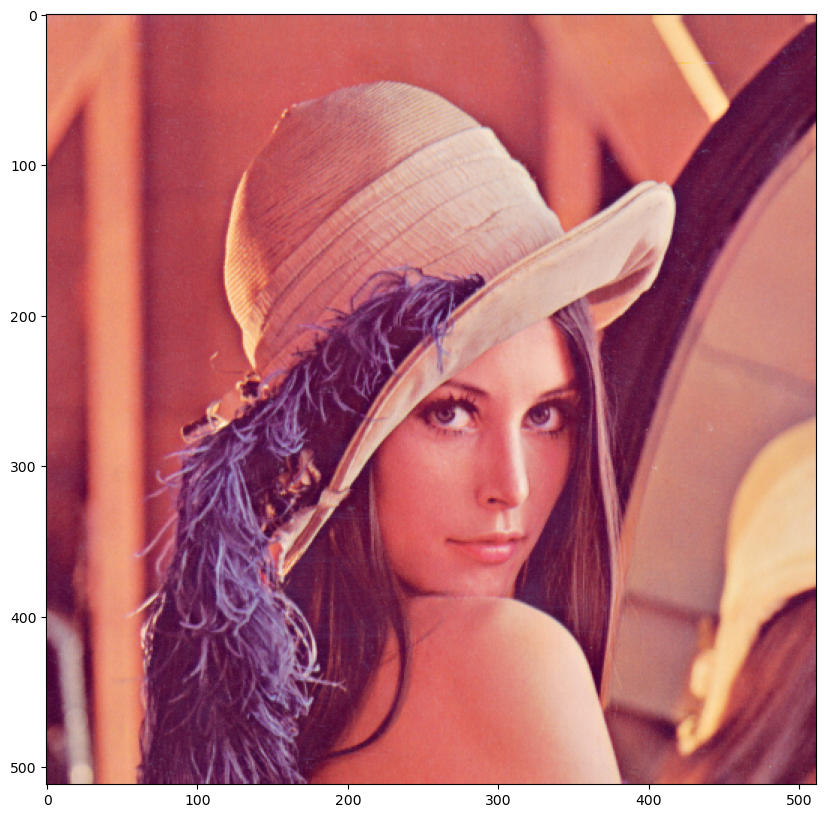

In [4]:
image = Image.open("lenna.png")
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

The images we are working with are comprised of RGB values, which are values from 0 to 255. Zero means white noise, this makes the image look grainy:



When adding noise to an image sometimes the value might be greater than 255, in this case 256, is subtracted from the value to wrap the number around keeping it between 0 and 255. For example, consider an image with an RGB value of 137 and we add noise with an RGB value of 215 to get an RGB value of 352. We then subtract 256, the total number of possible values between 0 and 255, to get a number between 0 and 255.

<h2>Filtering Noise</h2>
To be able to create customer kernels and use predefined filters we must import the following library

In [6]:
from PIL import ImageFilter

Smoothing filters average out the Pixels within a neighborhood, they are sometimes called low pass filters. For mean filtering, the kernel simply averages out the kernels in a neighborhood.

In [7]:
#create a kernel which is a 5 by 5 array where each value is 1/36
kernel = np.ones((5,5)) / 36

# Create a ImageFilter Kernel by providing the kernel size and a flattened kernel
kernel_filter = ImageFilter.Kernel((5,5), kernel.flatten())

The function filter performs a convolution between the image and the kernel on each color channel independently.

In [8]:
# Filters the images using the kernel
image_filtered = noisy_image.filter(kernel_filter)

We can plot the image before and after the filtering. We see the noise is reduced, but the image is blurry:

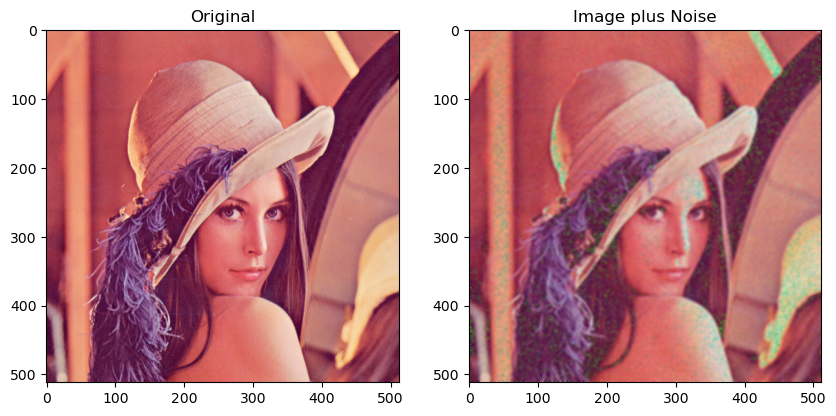

In [9]:
# Plots the Filtered and Image with Noise using the function defined at the top
plot_image(image, image_filtered, title_1="Original", title_2="Image plus Noise")

A smaller kernel keeps the image sharp, but filters less noise, here we try a 3x3 kernel. You can see her shoulders are sharper in this image but the green noise is brighter than the filtered image above.

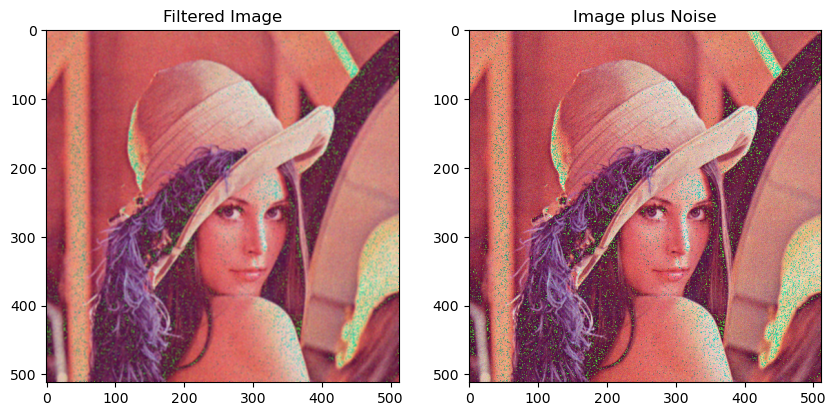

In [11]:
# Create a kernel which is a 3 by 3 array where each value is 1/36
kernel = np.ones((3,3))/36
# Create a ImageFilter Kernel by providing the kernel size and a flattened kernel
kernel_filter = ImageFilter.Kernel((3,3), kernel.flatten())
#filters the images using kernel
image_filtered = noisy_image.filter(kernel_filter)

plot_image(image_filtered, noisy_image, title_1="Filtered Image", title_2="Image plus Noise")

# Gaussian Blur
To perform Gaussian Blur we use the filter function on an image using the predefined filter ImageFilter.GaussianBlur

<br>Parameters<br>

radius: blur kernel radius, default 2

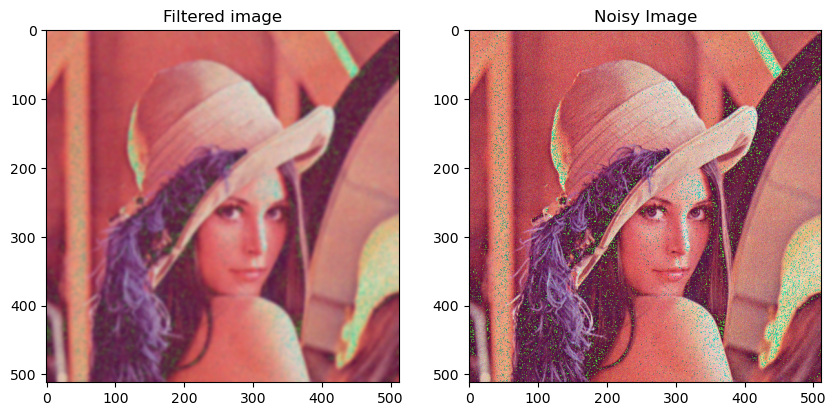

In [12]:
#filter image using gaussian blur
image_filtered = noisy_image.filter(ImageFilter.GaussianBlur)

#plot the filtered and unfiltered image with noise
plot_image(image_filtered, noisy_image, title_1="Filtered image", title_2="Noisy Image")

Lets try using a 4 by 4 kernel

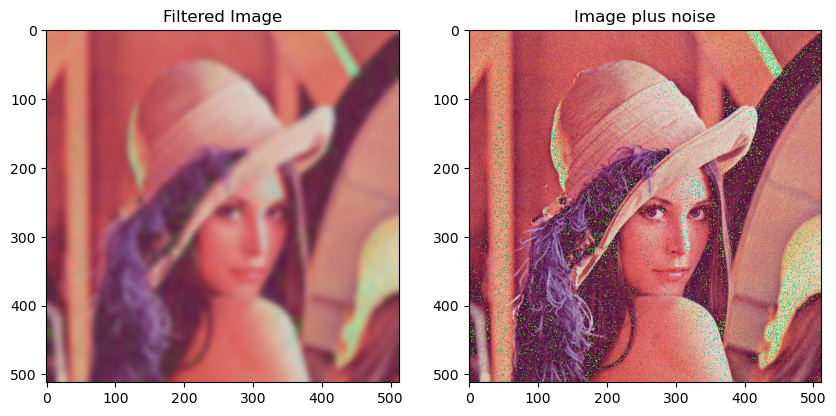

In [13]:
# Filters the images using GaussianBlur on the image with noise using a 4 by 4 kernel 
image_filtered = noisy_image.filter(ImageFilter.GaussianBlur(4))

# Plots the Filtered Image then the Unfiltered Image with Noise

plot_image(image_filtered, noisy_image, title_1="Filtered Image", title_2="Image plus noise
           ")

# Image Sharpening
Image Sharpening involves smoothing the image and calculating the derivatives. We can accomplish image sharpening by applying the following Kernel.

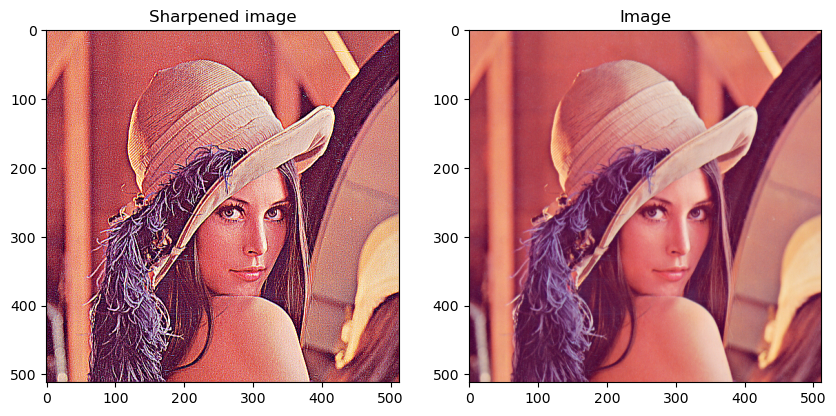

In [14]:
#common kernel for image sharpening

kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])

kernel = ImageFilter.Kernel((3,3), kernel.flatten())

# Applys the sharpening filter using kernel on the original image without noise
sharpened = image.filter(kernel)

#plots the sharpened image and original image
plot_image(sharpened, image, title_1="Sharpened image", title_2="Image")

We can also sharpen using a predefined filter

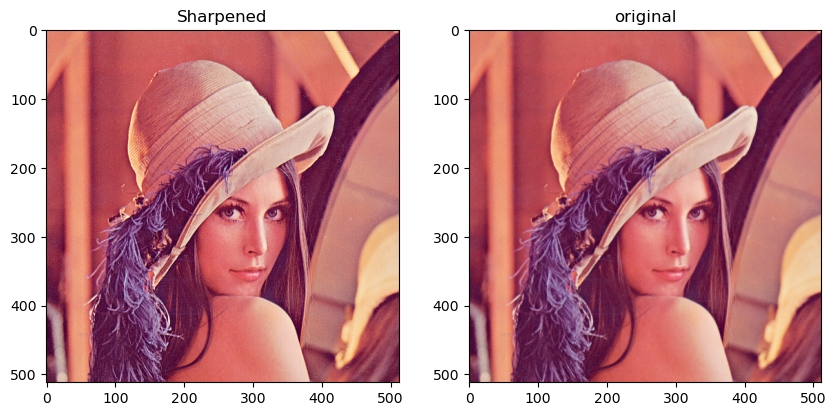

In [16]:
# Sharpends image using predefined image filter from PIL
sharpened = image.filter(ImageFilter.SHARPEN)

#plot the sharpened and actual image
plot_image(sharpened, image, title_1="Sharpened", title_2="original")

# Edges
Edges are where pixel intensities change. The Gradient of a function outputs the rate of change; we can approximate the gradient of a grayscale image with convolution. Consider the following image:

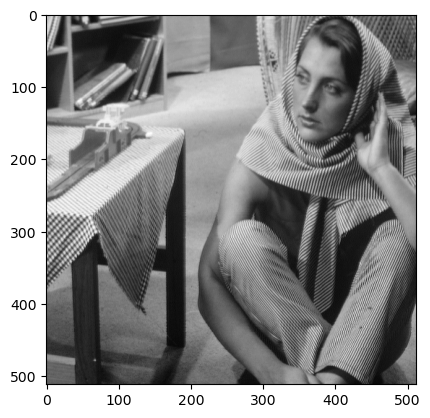

In [17]:
img_gray = Image.open("barbara.png")

# Renders the image from the array of data, notice how it is 2 diemensional instead of 3 diemensional because it has no color
plt.imshow(img_gray, cmap='gray')

We enhance the edges so they are better picked up when we use edge detection

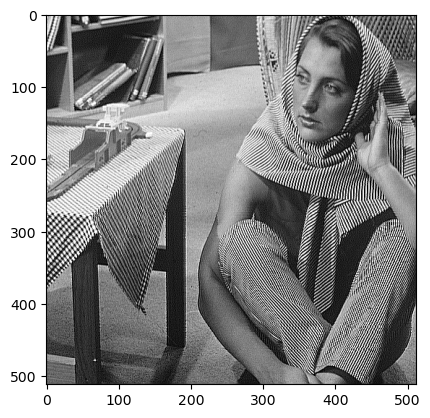

In [18]:
#filters the image using EDGE Enhance filter
img_gray = img_gray.filter(ImageFilter.EDGE_ENHANCE)

#Renders the enhanced image
plt.imshow(img_gray, cmap='gray')

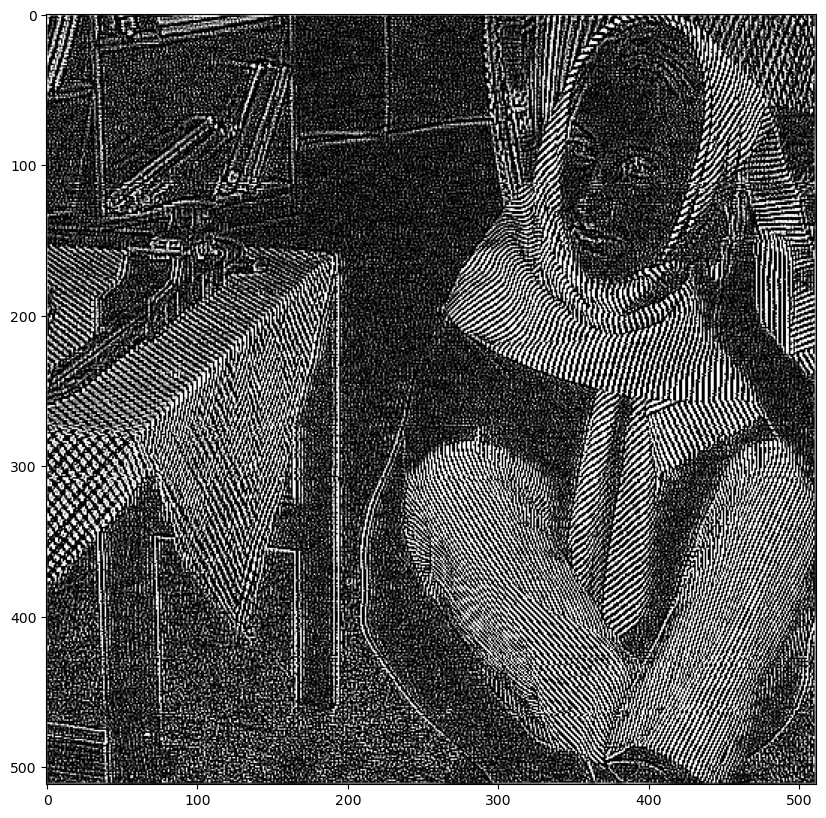

In [19]:
# Filters the images using FIND_EDGES filter
img_gray = img_gray.filter(ImageFilter.FIND_EDGES)

#renders the filtered image
plt.figure(figsize=(10,10))
plt.imshow(img_gray, cmap='gray')

# Median
Median filters find the median of all the pixels under the kernel area and the central element is replaced with this median value.

We can apply median filters to regular images but let’s see how we can use a median filter to improve segmentation. Consider the cameraman example:

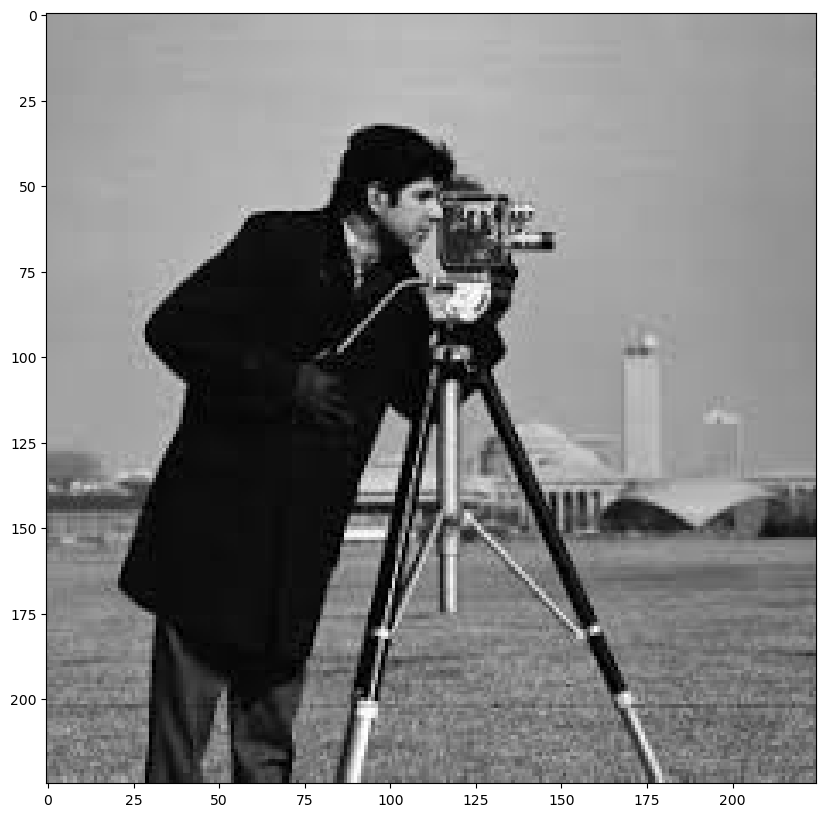

In [20]:
#load the camera man image
image = Image.open("cameraman.jpeg")

plt.figure(figsize=(10,10))

plt.imshow(image, cmap='gray')